In [1]:
#.shape , .info(), .describe()
#일반적으로 nan데이터 처리하고 데이터관리함

In [2]:
import pandas as pd

In [3]:
file_path = './dataset/auto-mpg.csv'
df = pd.read_csv(file_path, header=None)

df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [24]:
#칼럼명 부여
df.columns = ['mpg','cylinders','displacement','horsepower',
             'weight', 'aceleration','model year','origin','name']
print(df.head(3));print()
print(df.tail(3));print()
print(df.shape) #행과 열의 갯수
#간단한 통계자료
df.describe(include='all')

    mpg  cylinders  displacement horsepower  weight  aceleration  model year  \
0  18.0          8         307.0      130.0  3504.0         12.0          70   
1  15.0          8         350.0      165.0  3693.0         11.5          70   
2  18.0          8         318.0      150.0  3436.0         11.0          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  

      mpg  cylinders  displacement horsepower  weight  aceleration  \
395  32.0          4         135.0      84.00  2295.0         11.6   
396  28.0          4         120.0      79.00  2625.0         18.6   
397  31.0          4         119.0      82.00  2720.0         19.4   

     model year  origin           name  
395          82       1  dodge rampage  
396          82       1    ford ranger  
397          82       1     chevy s-10  

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,aceleration,model year,origin,name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [9]:
print(df.count()) # 각 열의 유효한 자료의 갯수 #시리즈,데이터프레임 모두 존재
df.mpg.count() # mpg 칼럼의 유효한 자료의 갯수

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
aceleration     398
model year      398
orgin           398
name            398
dtype: int64


398

In [15]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
# 각 열의 유효한 자료의 갯수
titanic.count() #deck nan값이 많으므로 소거해보기
df_t = titanic.copy()

In [16]:
df_t.drop(columns='deck',axis=1,inplace=True)
df_t.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
embark_town    889
alive          891
alone          891
dtype: int64

In [ ]:
#각 열의 고유한 값의 갯수:df.value_counts(),df[열명].value_counts()
print(df.origin.value_counts())
df.value_counts()

In [26]:
#데이터프레임, 시리즈 모두사용가능
#평균값 : mean()
df.mean(numeric_only=True)
df[['mpg','weight','origin']].mean()

mpg         23.514573
weight    2970.424623
origin       1.572864
dtype: float64

In [27]:
#중간값 : median()
df.mean(numeric_only=True)
df[['mpg','weight','origin']].median()

mpg         23.0
weight    2803.5
origin       1.0
dtype: float64

In [28]:
#최대값 : max()
#최소값 : min()
#표준편차 : std()
#분산 : var()
#상관계수 : corr() -> 열 이름 리스트
df[['mpg','weight']].corr()

,mpg,weight
mpg,1.000000,-0.831741
weight,-0.831741,1.000000


In [43]:
df_t.head()
#가장 많은 나이 # age
print(df_t.age.max())
#클래스별 승객 인원수 # class
print(df_t['class'].value_counts())
#남자와 여자의 승객수 # sex
print(df_t.sex.value_counts())

80.0
Third     491
First     216
Second    184
Name: class, dtype: int64
male      577
female    314
Name: sex, dtype: int64


In [59]:
#전체의 평균 나이보다 적은 나이의 승객 정보를 출력
#age,class,sex정보만 출력
#df_t.age.mean()평균나이
df_mask = [df_t.age.mean()>df_t.age]
print(df_mask)
df_t.loc[df_t.age.mean()>df_t.age,['age','class','sex']]



[0       True
1      False
2       True
3      False
4      False
       ...  
886     True
887     True
888    False
889     True
890    False
Name: age, Length: 891, dtype: bool]


,age,class,sex
0,22.0,Third,male
2,26.0,Third,female
7,2.0,Third,male
8,27.0,Third,female
9,14.0,Second,female
...,...,...,...
883,28.0,Second,male
884,25.0,Third,male
886,27.0,Second,male
887,19.0,First,female


In [68]:
# pandas의 내장 그래프
df = pd.read_excel("./dataset/남북한발전전력량.xlsx")
#남한과 북한의 합계 행을 가져온다
#컬럼은 1991년 이후 자료부터
df_ns = df.iloc[[0,5],3:]
print(df_ns) #인덱스를 'South','Nouth'로 등록
df_ns.index = ['South','Nouth']
df_ns

   1991  1992  1993  1994  1995  1996  1997  1998  1999  2000  ...  2007  \
0  1186  1310  1444  1650  1847  2055  2244  2153  2393  2664  ...  4031   
5   263   247   221   231   230   213   193   170   186   194  ...   236   

   2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  4224  4336  4747  4969  5096  5171  5220  5281  5404  
5   255   235   237   211   215   221   216   190   239  

[2 rows x 26 columns]


,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
South,1186,1310,1444,1650,1847,2055,2244,2153,2393,2664,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
Nouth,263,247,221,231,230,213,193,170,186,194,...,236,255,235,237,211,215,221,216,190,239


In [70]:
df_ns.columns #컬럼명을 숫자로 변경
df_ns.columns = df_ns.columns.map(int)
df_ns.columns

Int64Index([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016],
           dtype='int64')

<AxesSubplot:>

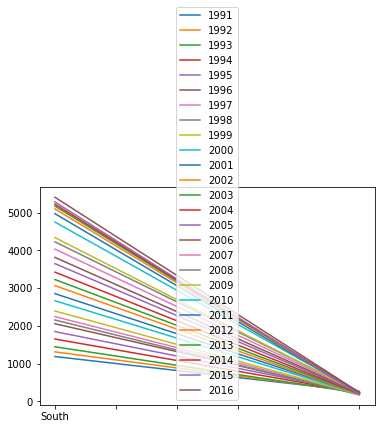

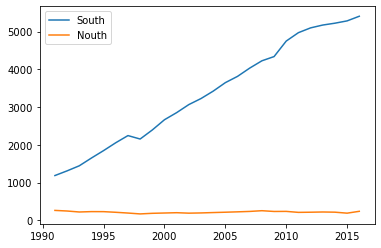

In [73]:
df_ns.plot() #그래프로 표현 (기본은 line 그래프)
#인덱스와 컬럽을 교환 .transpose() or 대문자T
tdf_ns = df_ns.transpose()
tdf_ns
tdf_ns.plot()

<AxesSubplot:ylabel='Frequency'>

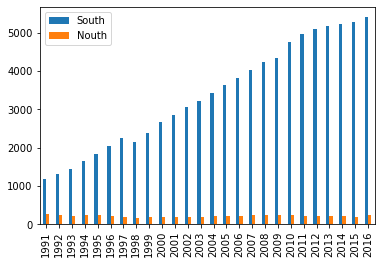

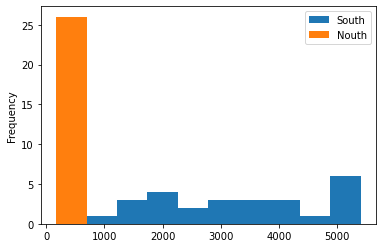

In [77]:
tdf_ns.plot(kind= 'bar')
tdf_ns.plot(kind='hist')
# tdf_ns.plot(kind='scatter') scatter는 x,y축이 점으로 만나야한다.

In [78]:
df = pd.read_csv('./dataset/auto-mpg.csv')
df.columns = ['mpg','cylinders','displacement','horsepower',
             'weight', 'aceleration','model year','origin','name']

,weight,mpg
weight,1.000000,-0.831558
mpg,-0.831558,1.000000


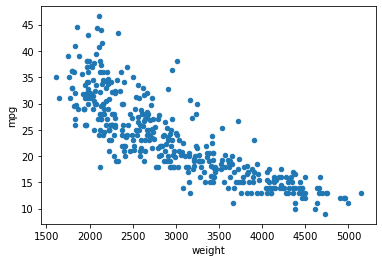

In [80]:
df.count()
df.plot(kind='scatter', x='weight',y='mpg')
# 두 변수간의 상관관계를 그림으로 표현
df[['weight','mpg']].corr()

<AxesSubplot:>

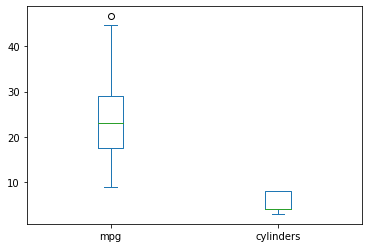

In [83]:
#박스플롯 : 데이터의 분포와 분산정도, mpg와 실린더 사이의 박스플롯
df[['mpg','cylinders']].plot(kind='box')
# df['mpg'].plot(kind='box')

<AxesSubplot:>

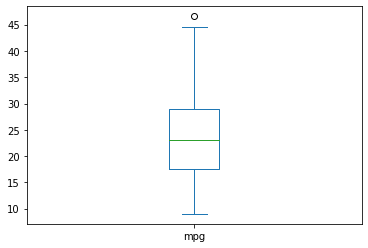

In [85]:
df['mpg'].plot(kind='box') # 불량 데이터를 감지할 때 활용 이상점(데이터)

<AxesSubplot:>

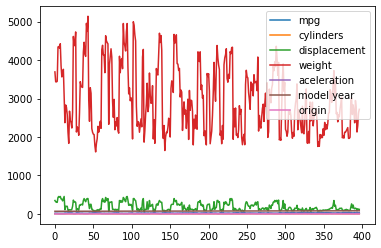

In [86]:
df.plot() # kind='line','bar','barh','scatter','box'
# line: 선형 회귀분석
# scatter: 두 컬럼사이의 연관성
# box: 자료의 분산정도, 이상점을 발견하고자 하는 경우 사용
#matplotlib 그래프 전용 툴
